In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install requests

In [3]:
import requests

#importing countries
url= "https://api.worldbank.org/countries?format=json&per_page=500"
response= requests.get(url)
print(response.status_code)
response.json()

200


[{'page': 1, 'pages': 1, 'per_page': '500', 'total': 296},
 [{'id': 'ABW',
   'iso2Code': 'AW',
   'name': 'Aruba',
   'region': {'id': 'LCN',
    'iso2code': 'ZJ',
    'value': 'Latin America & Caribbean '},
   'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
   'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
   'capitalCity': 'Oranjestad',
   'longitude': '-70.0167',
   'latitude': '12.5167'},
  {'id': 'AFE',
   'iso2Code': 'ZH',
   'name': 'Africa Eastern and Southern',
   'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'},
   'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'},
   'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'},
   'capitalCity': '',
   'longitude': '',
   'latitude': ''},
  {'id': 'AFG',
   'iso2Code': 'AF',
   'name': 'Afghanistan',
   'region': {'id':

In [4]:
data = response.json()
print(data)
print(len(data))

[{'page': 1, 'pages': 1, 'per_page': '500', 'total': 296}, [{'id': 'ABW', 'iso2Code': 'AW', 'name': 'Aruba', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'}, 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'}, 'capitalCity': 'Oranjestad', 'longitude': '-70.0167', 'latitude': '12.5167'}, {'id': 'AFE', 'iso2Code': 'ZH', 'name': 'Africa Eastern and Southern', 'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'}, 'capitalCity': '', 'longitude': '', 'latitude': ''}, {'id': 'AFG', 'iso2Code': 'AF', 'name': 'Afghanistan', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East, North Africa, Afghanistan &

In [5]:
countries=data[1]
countries=pd.DataFrame(countries)
countries.head()


,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
2,AFG,AF,Afghanistan,"{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,


In [6]:
print(countries.columns)


Index(['id', 'iso2Code', 'name', 'region', 'adminregion', 'incomeLevel',
       'lendingType', 'capitalCity', 'longitude', 'latitude'],
      dtype='object')


In [7]:
countries["lendingType"][0]

{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'}

In [8]:
#using Lamda function to just return the value key
countries["region"]= countries["region"].apply(lambda x: x["value"])

In [9]:
countries['incomeLevel']= countries['incomeLevel'].apply(lambda x: x['value'])

In [10]:
countries['lendingType']= countries['lendingType'].apply(lambda x: x['value'])

In [11]:
countries

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,"{'id': '', 'iso2code': '', 'value': ''}",High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,"{'id': '', 'iso2code': '', 'value': ''}",Aggregates,Aggregates,,,
2,AFG,AF,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...",Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,"{'id': '', 'iso2code': '', 'value': ''}",Aggregates,Aggregates,,,
4,AFW,ZI,Africa Western and Central,Aggregates,"{'id': '', 'iso2code': '', 'value': ''}",Aggregates,Aggregates,,,
...,...,...,...,...,...,...,...,...,...,...
291,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,"{'id': '', 'iso2code': '', 'value': ''}",Aggregates,Aggregates,,,
292,YEM,YE,"Yemen, Rep.","Middle East, North Africa, Afghanistan & Pakistan","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...",Low income,IDA,Sana'a,44.2075,15.352
293,ZAF,ZA,South Africa,Sub-Saharan Africa,"{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...",Upper middle income,IBRD,Pretoria,28.1871,-25.746
294,ZMB,ZM,Zambia,Sub-Saharan Africa,"{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...",Lower middle income,IDA,Lusaka,28.2937,-15.3982


In [12]:
countries.drop(columns=['adminregion', 'lendingType'], inplace=True)

In [13]:
countries['region'].values

array(['Latin America & Caribbean ', 'Aggregates',
       'Middle East, North Africa, Afghanistan & Pakistan', 'Aggregates',
       'Aggregates', 'Sub-Saharan Africa ', 'Europe & Central Asia',
       'Europe & Central Asia', 'Aggregates',
       'Middle East, North Africa, Afghanistan & Pakistan',
       'Latin America & Caribbean ', 'Europe & Central Asia',
       'East Asia & Pacific', 'Latin America & Caribbean ',
       'East Asia & Pacific', 'Europe & Central Asia',
       'Europe & Central Asia', 'Sub-Saharan Africa ', 'Aggregates',
       'Aggregates', 'Europe & Central Asia', 'Sub-Saharan Africa ',
       'Sub-Saharan Africa ', 'South Asia', 'Europe & Central Asia',
       'Aggregates', 'Middle East, North Africa, Afghanistan & Pakistan',
       'Latin America & Caribbean ', 'Europe & Central Asia',
       'Aggregates', 'Europe & Central Asia',
       'Latin America & Caribbean ', 'Aggregates', 'North America',
       'Latin America & Caribbean ', 'Latin America & Caribbean ',

In [14]:
countries["region"].unique()

array(['Latin America & Caribbean ', 'Aggregates',
       'Middle East, North Africa, Afghanistan & Pakistan',
       'Sub-Saharan Africa ', 'Europe & Central Asia',
       'East Asia & Pacific', 'South Asia', 'North America'], dtype=object)

In [15]:
countries[countries['region']=='Aggregates']
countries.rename(columns={"iso2Code":"country_id"}, inplace=True)

In [16]:
#code for indicators
base_url= "https://api.worldbank.org/v2/indicator?format=json"
response= requests.get(base_url)
print(response.status_code)
indicators_data = response.json()

200


In [17]:
print(indicators_data[0])

{'page': 1, 'pages': 587, 'per_page': '50', 'total': 29323}


In [18]:
indicators_data[1]

[{'id': '1.0.HCount.1.90usd',
  'name': 'Poverty Headcount ($1.90 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.2.5usd',
  'name': 'Poverty Headcount ($2.50 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.Mid10to50',
  'name': 'Middle Class ($10-50 a day) Headcount',
  'unit': '',
  'source': {'id': '37

In [19]:
all_dfs=[]
for i in range(1,588):
  url = f"https://api.worldbank.org/v2/indicator?format=json&per_page=500&page={i}"
  response= requests.get(url)

  if response.status_code ==200:
    data= response.json()

    if len(data) <2:
      print(f"No data at page : {i}")
    indicators=data[1]

    #running a loop over Indicators dictionary and storing it in a dataframe by accessing its ID and name
    df= pd.DataFrame([{'id':item["id"],
                   "name":item["name"]} for item in indicators])

    all_dfs.append(df)

    print(f"Page{i} : {len(df)} indicators collected ")

  else:
    print(f"Failed to retrieve data from page {i}. Status code: {response.status_code}")



Page1 : 500 indicators collected 
Page2 : 500 indicators collected 
Page3 : 500 indicators collected 
Page4 : 500 indicators collected 
Page5 : 500 indicators collected 
Page6 : 500 indicators collected 
Page7 : 500 indicators collected 
Page8 : 500 indicators collected 
Page9 : 500 indicators collected 
Page10 : 500 indicators collected 
Page11 : 500 indicators collected 
Page12 : 500 indicators collected 
Page13 : 500 indicators collected 
Page14 : 500 indicators collected 
Page15 : 500 indicators collected 
Page16 : 500 indicators collected 
Page17 : 500 indicators collected 
Page18 : 500 indicators collected 
Page19 : 500 indicators collected 
Page20 : 500 indicators collected 
Page21 : 500 indicators collected 
Page22 : 500 indicators collected 
Page23 : 500 indicators collected 
Page24 : 500 indicators collected 
Page25 : 500 indicators collected 
Page26 : 500 indicators collected 
Page27 : 500 indicators collected 
Page28 : 500 indicators collected 
Page29 : 500 indicators colle

In [20]:
final_df=pd.concat(all_dfs, ignore_index=True)
final_df

,id,name
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day)
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day)
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day)
...,...,...
29318,ytil_some_dfcl_all,Youth idle rate (% of persons with some degree...
29319,ytil_some_dfcl_fem,Youth idle rate (% of female persons with some...
29320,ytil_some_dfcl_male,Youth idle rate (% of male persons with some d...
29321,ytil_some_dfcl_rur,Youth idle rate (% of persons living in rural ...


In [21]:
#creating a .csv file
final_df.to_csv("final_df.csv")

In [22]:
#indicator groups
indicator_groups = {
"economic_activity_growth": [
"NY.GDP.MKTP.KD.ZG", # GDP growth (annual %)
"NY.GDP.PCAP.CD" # GDP per capita (current US$)
],
"labour_market_indicators": [
"SL.UEM.TOTL.ZS", # Unemployment total
"SL.UEM.1524.ZS", # Unemployment youth total (ages 15–24)
"SL.TLF.TOTL.IN" # Labour force, total
],
"trade_globalization": [
"NE.EXP.GNFS.CD", # Exports of goods and services (current US$)
"NE.IMP.GNFS.CD" # Imports of goods and services (current US$)
],
"poverty_inequality": [
"SI.POV.NAHC", # Poverty headcount ratio at national poverty lines (% of population)
"SI.POV.GINI" # Gini index (measure of income inequality)
],
"environmental_indicators": [
"EG.FEC.RNEW.ZS", # Renewable energy consumption (% of total final energy consumption)
"AG.LND.FRST.ZS" # Forest area (% of land area)
],
"health_indicators": [
"SP.DYN.LE00.IN", # Life expectancy at birth
"SP.DYN.IMRT.IN", # Infant mortality rate
"SH.H2O.BASW.ZS", # Access to at least basic water services (% of population)
"SH.XPD.CHEX.GD.ZS", # Current health expenditure (% of GDP)
"SH.IMM.IDPT", # Immunization, DPT (% of children ages 12–23 months)
"SH.IMM.MEAS", # Immunization, measles (% of children ages 12–23 months)
"SH.MMR.RISK.ZS", # Risk of maternal death
"SH.DTH.COMM.ZS", # Deaths from communicable diseases (% of total)
"SH.TBS.INCD", # Tuberculosis incidence (per 100,000 people)
"SH.STA.BRTC.ZS", # Births attended by skilled health staff (%)
"SH.STA.MMRT", # Maternal mortality ratio (modeled estimate, per 100,000 live births)
"SP.POP.65UP.TO.ZS", # Population ages 65 and above (% of total population)
"SH.HIV.INCD.ZS" # HIV incidence rate (per 1,000 uninfected population ages 15–49)
],
"technology_indicators": [
"IT.NET.USER.ZS", # Individuals using the Internet (% of population)
"IT.CEL.SETS.P2" # Mobile cellular subscriptions (per 100 people)
]}

In [23]:
#extract values for various indicators for different domain for each country
#key - domain, values- list of indicators
response = requests.get("https://api.worldbank.org/countries/all/indicators/SIT.CEL.SETS.P2?format=json")

print(response.status_code)




200


In [24]:
#base_url= f"https://api.worldbank.org/countries/all/indicator/{}?format=json&per_page=1000&page={}"

In [25]:
import time
base_url="https://api.worldbank.org/countries/all/indicators/{}?format=json&per_page=1000&page={}"


category_dataframes={}
for category,indicators  in indicator_groups.items():
  print(f"Fetch intofmation  for category:{category}")
  all_dfs_for_category=[]


  for indicator_code in indicators:
    print(f"Fetching indicator: {indicator_code}")
    page=1

    while True:
      url = base_url.format(indicator_code, page)
      response= requests.get(url)
      if response.status_code!=200:
        print(f"No data for indicator{indicator_code} on page {page}")
        break

      data = response.json()
      if len(data)<2:
        print(f"failed at page{page}")
        break

      total_pages = data[0]["pages"]
      record= data[1]

      df= pd.json_normalize(record)
      df= df[[
          "country.id","country.value","indicator.id",
          "indicator.value","date","value"
          ]].rename(columns={
              "country.id":"country_id",
              "country.value":"country_value",
              "indicator.id":"indicator_id",
              "indicator.value":"indicator_name",
              "date":"year"
          })

      df= df[df["year"].astype(int)>2015]
      all_dfs_for_category.append(df)

      if page>=total_pages:
        break
      else:
        page+=1
        time.sleep(0.3)

  if all_dfs_for_category:
      combined_df= pd.concat(all_dfs_for_category, ignore_index=True)
      category_dataframes[category]=combined_df
      print(f"Total rows  collected for {category}:{len(combined_df)}")
  else:
      print(f"No data collected for {category}")


print("Data Fetching completed")




Fetch intofmation  for category:economic_activity_growth
Fetching indicator: NY.GDP.MKTP.KD.ZG
Fetching indicator: NY.GDP.PCAP.CD
Total rows  collected for economic_activity_growth:4788
Fetch intofmation  for category:labour_market_indicators
Fetching indicator: SL.UEM.TOTL.ZS
Fetching indicator: SL.UEM.1524.ZS
Fetching indicator: SL.TLF.TOTL.IN
Total rows  collected for labour_market_indicators:7182
Fetch intofmation  for category:trade_globalization
Fetching indicator: NE.EXP.GNFS.CD
Fetching indicator: NE.IMP.GNFS.CD
Total rows  collected for trade_globalization:4788
Fetch intofmation  for category:poverty_inequality
Fetching indicator: SI.POV.NAHC
Fetching indicator: SI.POV.GINI


/tmp/ipython-input-3917251288.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for poverty_inequality:4788
Fetch intofmation  for category:environmental_indicators
Fetching indicator: EG.FEC.RNEW.ZS
Fetching indicator: AG.LND.FRST.ZS
Total rows  collected for environmental_indicators:4788
Fetch intofmation  for category:health_indicators
Fetching indicator: SP.DYN.LE00.IN
Fetching indicator: SP.DYN.IMRT.IN
Fetching indicator: SH.H2O.BASW.ZS
Fetching indicator: SH.XPD.CHEX.GD.ZS
Fetching indicator: SH.IMM.IDPT
Fetching indicator: SH.IMM.MEAS
Fetching indicator: SH.MMR.RISK.ZS
Fetching indicator: SH.DTH.COMM.ZS
Fetching indicator: SH.TBS.INCD
Fetching indicator: SH.STA.BRTC.ZS
Fetching indicator: SH.STA.MMRT
Fetching indicator: SP.POP.65UP.TO.ZS
Fetching indicator: SH.HIV.INCD.ZS
Total rows  collected for health_indicators:31122
Fetch intofmation  for category:technology_indicators
Fetching indicator: IT.NET.USER.ZS
Fetching indicator: IT.CEL.SETS.P2
Total rows  collected for technology_indicators:4788
Data Fetching completed


In [26]:
economic_activity= category_dataframes.get("economic_activity_growth", pd.DataFrame())
labour_market_jobs= category_dataframes.get("labour_market_indicators", pd.DataFrame())
trade_globalization= category_dataframes.get("trade_globalization", pd.DataFrame())
poverty_inequality= category_dataframes.get("poverty_inequality", pd.DataFrame())
environmental_indicators= category_dataframes.get("environmental_indicators", pd.DataFrame())
health_indicators= category_dataframes.get("health_indicators", pd.DataFrame())
technology_indicators= category_dataframes.get("technology_indicators", pd.DataFrame())

In [27]:
print(category_dataframes.keys())
category_dataframes


dict_keys(['economic_activity_growth', 'labour_market_indicators', 'trade_globalization', 'poverty_inequality', 'environmental_indicators', 'health_indicators', 'technology_indicators'])


{'economic_activity_growth':      country_id                country_value       indicator_id  \
 0            ZH  Africa Eastern and Southern  NY.GDP.MKTP.KD.ZG   
 1            ZH  Africa Eastern and Southern  NY.GDP.MKTP.KD.ZG   
 2            ZH  Africa Eastern and Southern  NY.GDP.MKTP.KD.ZG   
 3            ZH  Africa Eastern and Southern  NY.GDP.MKTP.KD.ZG   
 4            ZH  Africa Eastern and Southern  NY.GDP.MKTP.KD.ZG   
 ...         ...                          ...                ...   
 4783         ZW                     Zimbabwe     NY.GDP.PCAP.CD   
 4784         ZW                     Zimbabwe     NY.GDP.PCAP.CD   
 4785         ZW                     Zimbabwe     NY.GDP.PCAP.CD   
 4786         ZW                     Zimbabwe     NY.GDP.PCAP.CD   
 4787         ZW                     Zimbabwe     NY.GDP.PCAP.CD   
 
                     indicator_name  year        value  
 0            GDP growth (annual %)  2024     2.763839  
 1            GDP growth (annual %)  202

In [28]:
economic= pd.merge(economic_activity, countries, on ="country_id", how="inner")
labour_market = pd.merge(labour_market_jobs, countries, on ="country_id", how="inner")
trade= pd.merge(trade_globalization, countries, on ="country_id", how="inner")
poverty= pd.merge(poverty_inequality, countries, on ="country_id", how="inner")
environment= pd.merge(environmental_indicators, countries, on ="country_id", how="inner")
health=pd.merge(health_indicators, countries, on ="country_id", how="inner")
technology=pd.merge(technology_indicators, countries, on ="country_id", how="inner")

In [29]:
economic.drop(columns=["indicator_id","name","id"], inplace=True)
trade.drop(columns=["indicator_id","name","id"], inplace=True)
labour_market.drop(columns=["indicator_id","name","id"], inplace=True)
poverty.drop(columns=["indicator_id","name","id"], inplace=True)
environment.drop(columns=["indicator_id","name","id"], inplace=True)
health.drop(columns=["indicator_id","name","id"], inplace=True)
technology.drop(columns=["indicator_id","name","id"], inplace=True)

In [30]:
economic

,country_id,country_value,indicator_name,year,value,region,incomeLevel,capitalCity,longitude,latitude
0,ZH,Africa Eastern and Southern,GDP growth (annual %),2024,2.763839,Aggregates,Aggregates,,,
1,ZH,Africa Eastern and Southern,GDP growth (annual %),2023,1.931160,Aggregates,Aggregates,,,
2,ZH,Africa Eastern and Southern,GDP growth (annual %),2022,3.722717,Aggregates,Aggregates,,,
3,ZH,Africa Eastern and Southern,GDP growth (annual %),2021,4.578772,Aggregates,Aggregates,,,
4,ZH,Africa Eastern and Southern,GDP growth (annual %),2020,-2.817572,Aggregates,Aggregates,,,
...,...,...,...,...,...,...,...,...,...,...
4783,ZW,Zimbabwe,GDP per capita (current US$),2020,2059.674454,Sub-Saharan Africa,Lower middle income,Harare,31.0672,-17.8312
4784,ZW,Zimbabwe,GDP per capita (current US$),2019,2184.329239,Sub-Saharan Africa,Lower middle income,Harare,31.0672,-17.8312
4785,ZW,Zimbabwe,GDP per capita (current US$),2018,2270.895319,Sub-Saharan Africa,Lower middle income,Harare,31.0672,-17.8312
4786,ZW,Zimbabwe,GDP per capita (current US$),2017,3445.449410,Sub-Saharan Africa,Lower middle income,Harare,31.0672,-17.8312


In [31]:
#converting all to csv files
economic.to_csv("economic.csv")
labour_market.to_csv("labour_market.csv")
trade.to_csv("trade.csv")
poverty.to_csv("poverty.csv")
environment.to_csv("environment.csv")
health.to_csv("health.csv")
technology.to_csv("technology.csv")


In [32]:
df_wide= health.pivot(index=["country_value", "year"],
                      columns=  "indicator_name",
                      values="value")

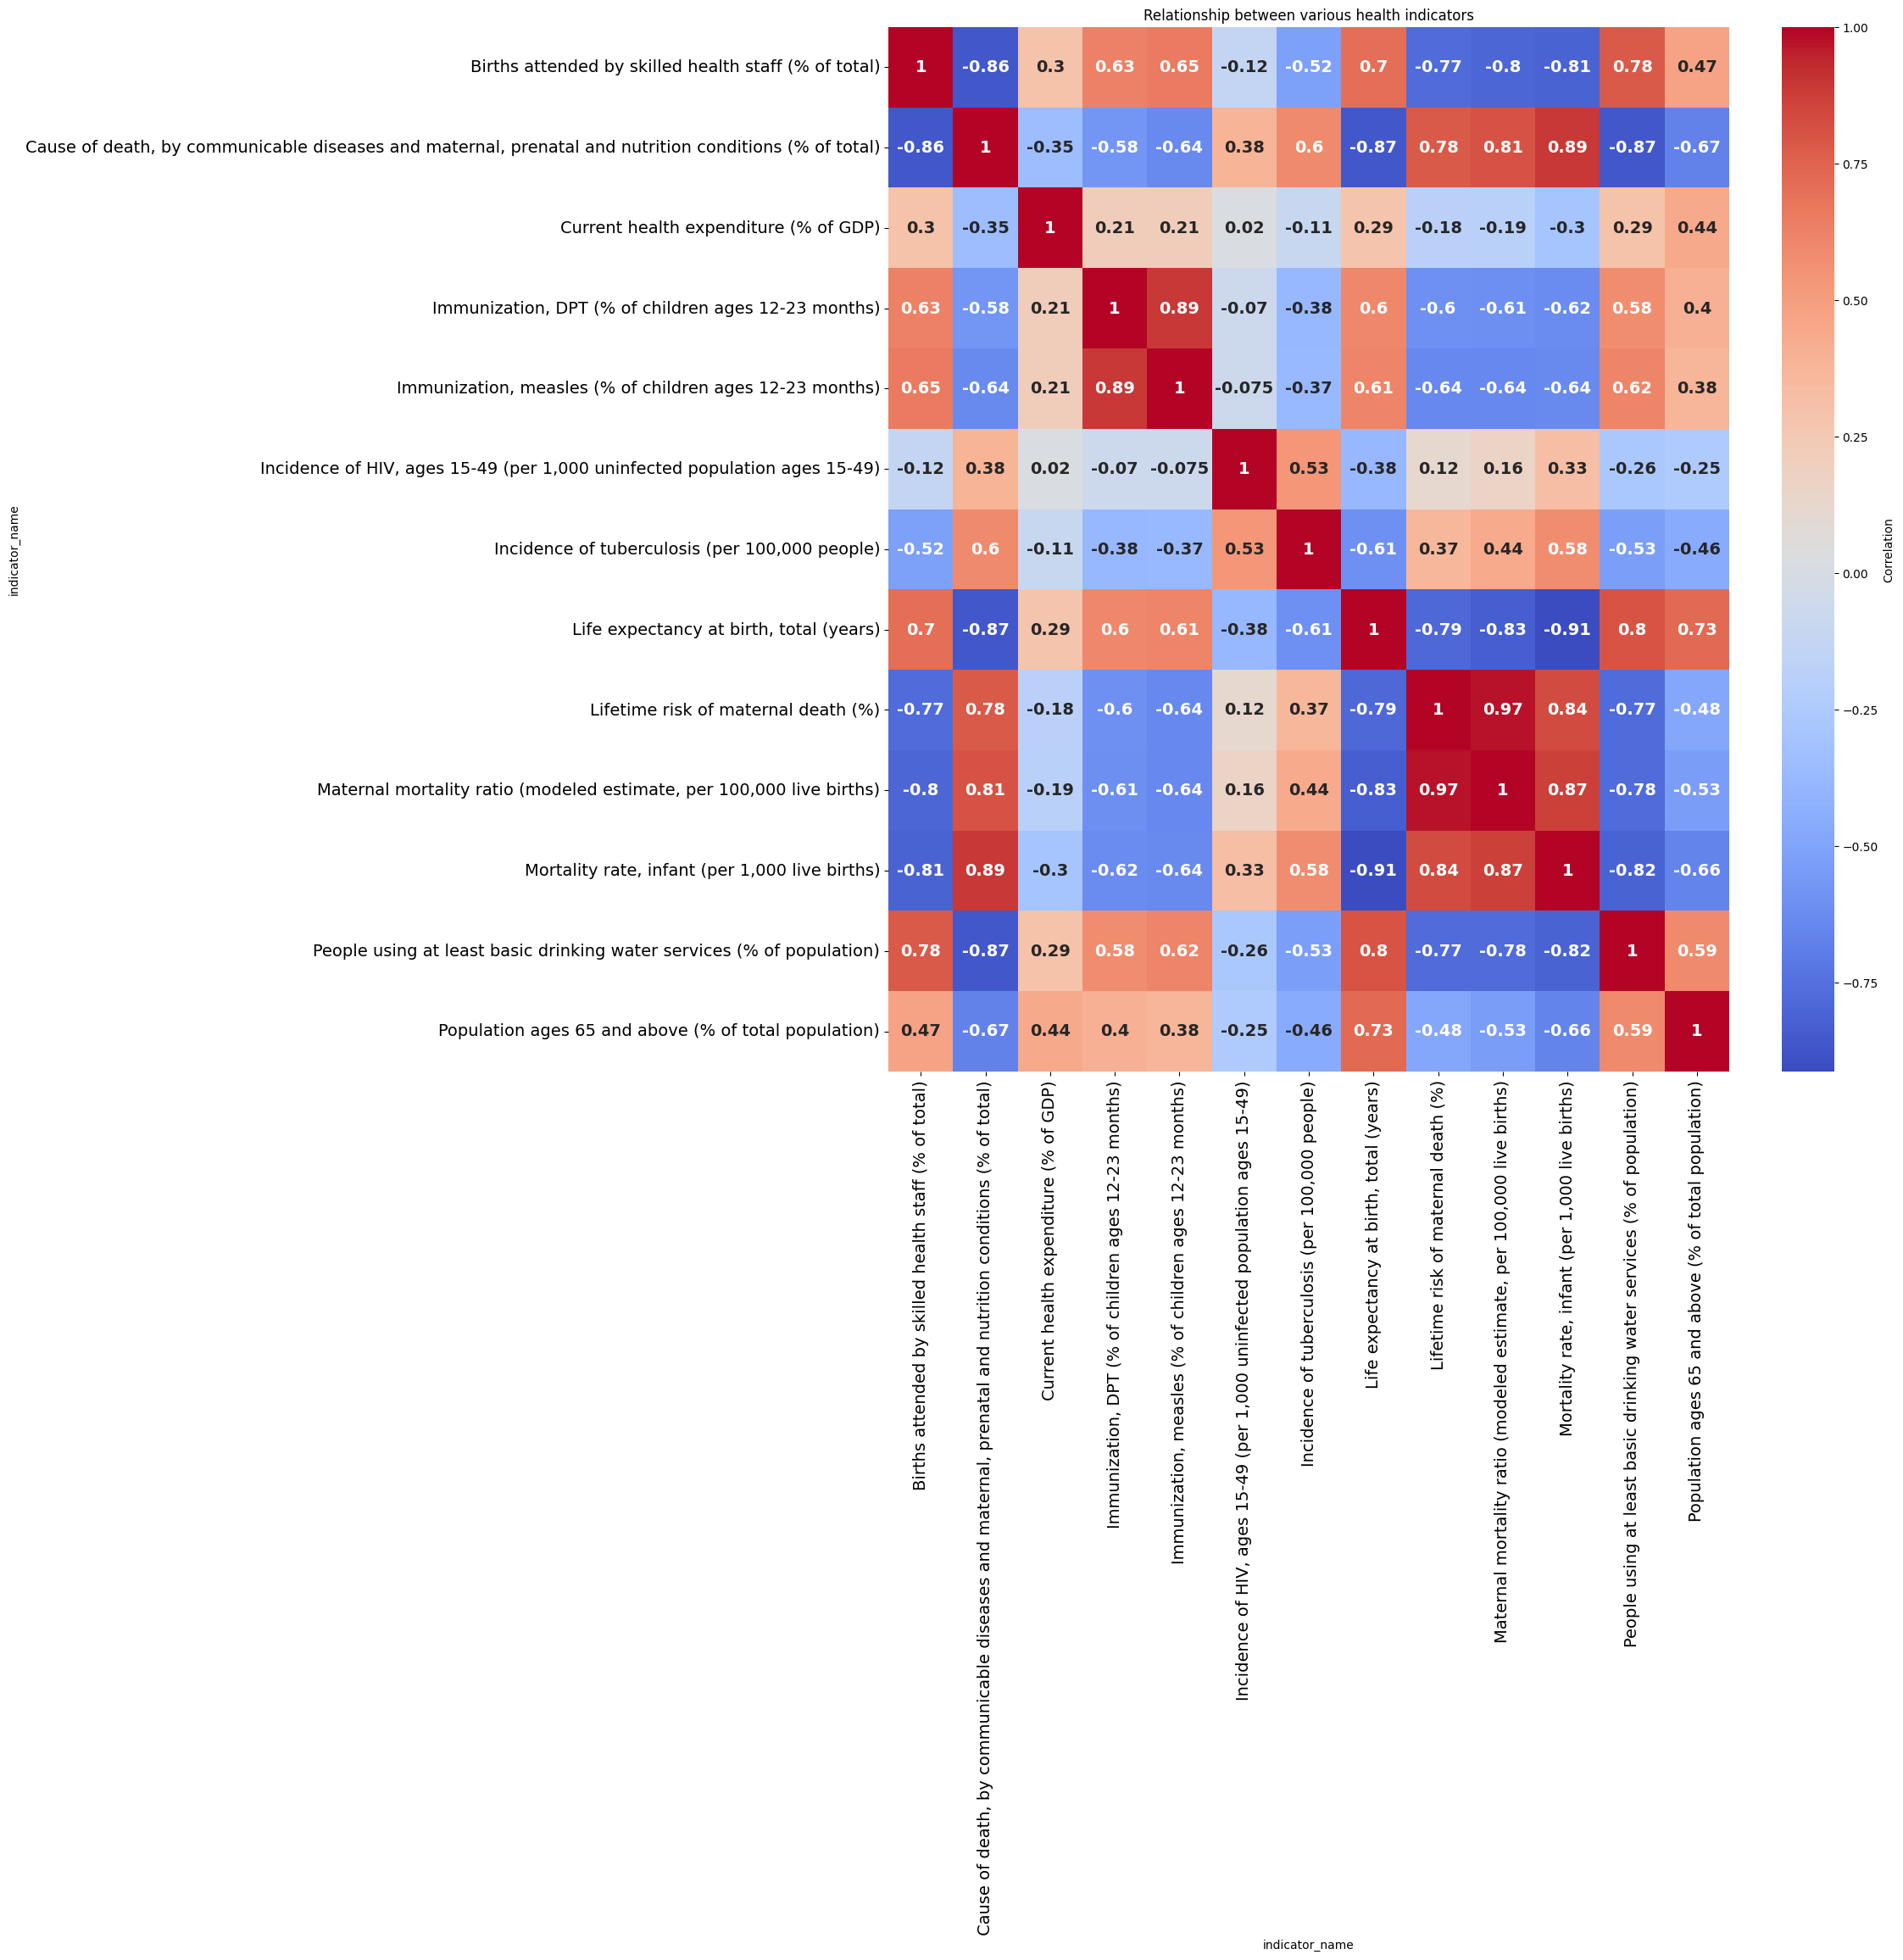

In [33]:
corr= df_wide.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16), facecolor="none")
ax= sns.heatmap(corr, annot=True, cmap="coolwarm", cbar_kws={"label" : "Correlation"},
                annot_kws={"fontsize":14, "fontweight":"bold"})
plt.title("Relationship between various health indicators")

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.show()

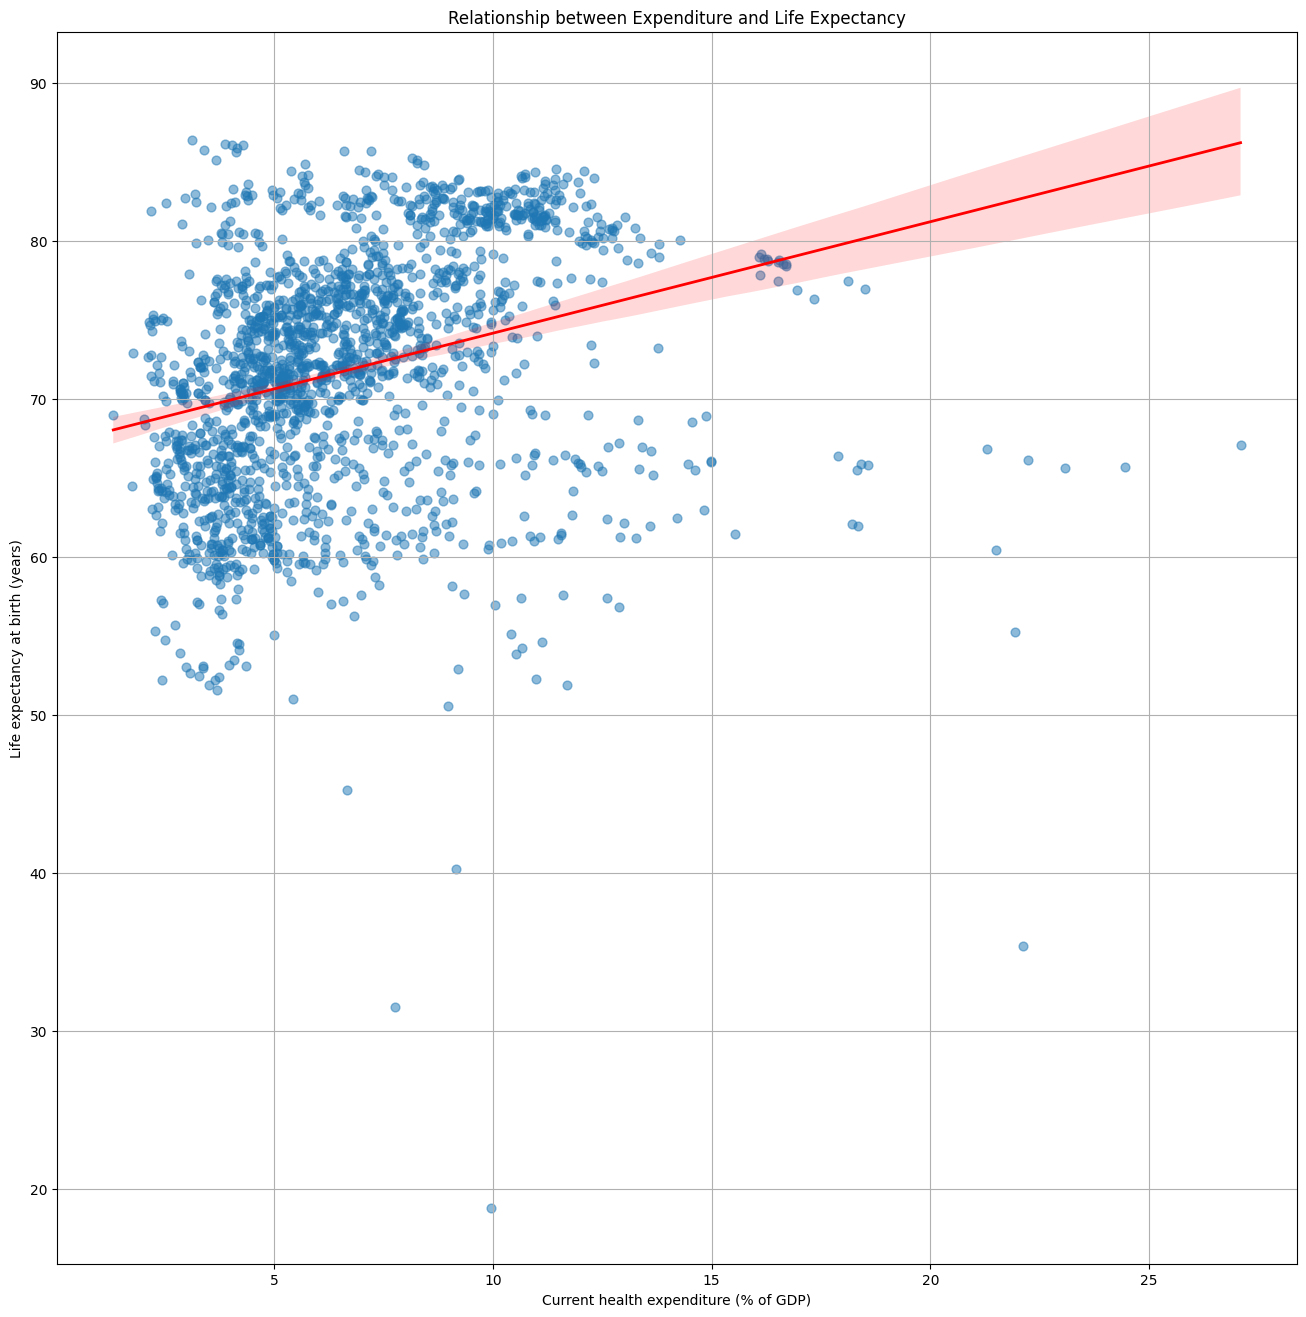

In [34]:
df_pivot= health.pivot(index=["country_value", "year"],
                      columns=  "indicator_name",
                      values="value").reset_index()
plt.figure(figsize=(16,16), facecolor="none")

ax=sns.regplot(data=df_pivot,
               x="Current health expenditure (% of GDP)",
               y="Life expectancy at birth, total (years)",
               scatter_kws={"alpha":0.5, "s":40},
               line_kws={"color":"red", "lw":2}
)
plt.title("Relationship between Expenditure and Life Expectancy")
plt.xlabel("Current health expenditure (% of GDP)")
plt.ylabel("Life expectancy at birth (years)")
plt.grid(True)
plt.show()